### Inside the heads of Putnuts
#### An analysis of the Only Murders in the Building TV show subreddit

Milindi Kodikara

#### Step 0 : : Set up

In [1]:
from client import client
import helper
import visualiser

import string

import nltk 
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')

from datetime import datetime
import calendar
import pandas as pd
import pyLDAvis.lda_model

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/milindi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
subreddit_name = 'OnlyMurdersHulu'

In [3]:
reddit_client = client()

In [4]:
# sanity check
print('Username :: ', reddit_client.user.me())

Username ::  Yet_Another_Me_00


In [5]:
subreddit = reddit_client.subreddit(subreddit_name)

print('Subreddit :: ', subreddit)

Subreddit ::  OnlyMurdersHulu


In [6]:
all_new_posts = [*subreddit.new(limit=None)] 

new_season_announcement_date = datetime(2023, 10, 4, 0, 0, 0)
week_after_season_premier = datetime(2024, 9, 3, 23, 59, 59)

timestamp_new_season_announcement_date = calendar.timegm(new_season_announcement_date.utctimetuple())
timestamp_week_after_season_premier = calendar.timegm(week_after_season_premier.utctimetuple())

posts = [post for post in all_new_posts if timestamp_new_season_announcement_date <= post.created_utc <= timestamp_week_after_season_premier]

print('New season announcement date: ', new_season_announcement_date.strftime("%d/%m/%Y"))
print('New season announcement date timestamp: ', timestamp_new_season_announcement_date)

print('Week after season premier: ', week_after_season_premier.strftime("%d/%m/%Y"))
print('Week after season premier timestamp: ', timestamp_week_after_season_premier)

print(f'New posts: {len(all_new_posts)}\nNew posts from the new season announcement leading up to season premier: {len(posts)}')

New season announcement date:  04/10/2023
New season announcement date timestamp:  1696377600
Week after season premier:  03/09/2024
Week after season premier timestamp:  1725407999
New posts: 989
New posts from the new season announcement leading up to season premier: 964


In [7]:
oliver = '#275c4d'
mabel = '#af221d'
charles = '#c59103'

In [8]:
# TODO: Ask why use Tweet Tokenizer, why not word_tokenizer
tokeniser = TweetTokenizer()
stemmer = nltk.stem.PorterStemmer()

# add punctuation to stopwords list
stop_words = stopwords.words('english') + list(string.punctuation) + ['rt', 'via', '...', '…', '"', "'", '`', '-', '..']

In [9]:
unprocessed_token_lists = []
processed_token_lists = []

omitb_df = pd.DataFrame(columns=['Post', 'Num_comments', 'Author', 'UTC_Date', 'Date', 'Upvote_ratio', 'Unprocessed_tokens', 'Processed_tokens'])

for submission in posts:
    print_processing = True if posts.index(submission) <= 15 else False
    post_description = submission.selftext
    post_title = submission.title
    post_title_description = post_title + " " + post_description
    
    utc_date = submission.created_utc
    post_date = pd.to_datetime(datetime.fromtimestamp(submission.created_utc).strftime("%d/%m/%Y"), format="%d/%m/%Y")
    
    unprocessed_tokens = tokeniser.tokenize(post_title_description)
    unprocessed_token_lists.append(unprocessed_tokens)
    
    processed_tokens = helper.process(post_title_description, tokeniser, stemmer, stop_words, print_processing)
    # text, tokeniser, stop_words
    processed_token_lists.append(processed_tokens)
    
    submission.comments.replace_more(limit=None)
    for comment in submission.comments:
        comment_text = comment.body
        
        unprocessed_comment_tokens = tokeniser.tokenize(comment_text)
        unprocessed_tokens = unprocessed_tokens + unprocessed_comment_tokens
        unprocessed_token_lists.append(unprocessed_comment_tokens)
        
        processed_comment_tokens = helper.process(comment_text, tokeniser, stemmer, stop_words, False)
        processed_tokens = processed_tokens + processed_comment_tokens
        processed_token_lists.append(processed_comment_tokens)
    
    if submission.author is None:
        submission_author = 'None'
    else:
        submission_author = submission.author.name
        
    omitb_df.loc[len(omitb_df.index)] = [post_title_description, submission.num_comments, submission_author, utc_date, post_date, submission.upvote_ratio, unprocessed_tokens, processed_tokens]



------------------------------------
Initial text
Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu's official Only Murders in the Building Season 4 post episode discussion thread. 

Use this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\*

If you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don't get spoiled.

A reminder that the sub will be locked for new posts for 24 hours following the episode's release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).

A reminder on spoilers:

* Keep spoilers out of any post titles
* Do not share spoilers from future episodes under t

In [10]:
sample_df = omitb_df.head(100)
sample_df.to_csv('sample.csv', index=False)

In [11]:
len(omitb_df)

964

In [12]:
omitb_df.head()

,Post,Num_comments,Author,UTC_Date,Date,Upvote_ratio,Unprocessed_tokens,Processed_tokens
0,"Season 4 - Episode 2: ""Gates of Heaven"" (Post ...",800,hannahlemp,1.725338e+09,2024-09-03,0.99,"[Season, 4, -, Episode, 2, :, "", Gates, of, He...","[season, episode, gates, heaven, post, episode..."
1,Post your theories tying all seasons together,26,MetARosetta,1.725336e+09,2024-09-03,0.85,"[Post, your, theories, tying, all, seasons, to...","[post, theories, tying, seasons, together, rew..."
2,"Season 4 - Episode 2 ""Gates of Heaven"" (Live D...",277,hannahlemp,1.725334e+09,2024-09-03,0.95,"[Season, 4, -, Episode, 2, "", Gates, of, Heave...","[season, episode, gates, heaven, live, discuss..."
3,One that that still bugs me One that from seas...,12,Potential_Classic_89,1.725333e+09,2024-09-03,0.87,"[One, that, that, still, bugs, me, One, that, ...","[one, still, bugs, one, season, still, bugs, m..."
4,i’m not gonna make it to midnight eastern. i’m...,12,No_Analysis_6204,1.725328e+09,2024-09-03,0.94,"[i, ’, m, not, gonna, make, it, to, midnight, ...","[im, gonna, make, midnight, eastern, im, tired..."


In [13]:
omitb_df.tail()

,Post,Num_comments,Author,UTC_Date,Date,Upvote_ratio,Unprocessed_tokens,Processed_tokens
959,Arconiacs are dropping like an actor down an e...,1,EyUpItsDan,1.697331e+09,2023-10-15,0.83,"[Arconiacs, are, dropping, like, an, actor, do...","[arconiacs, dropping, like, actor, elevator, s..."
960,What 5 actors would you like for Season 4? If ...,100,MHullRealtr77,1.697327e+09,2023-10-15,0.92,"[What, 5, actors, would, you, like, for, Seaso...","[actors, would, like, season, could, cast, act..."
961,Cara Delevigne Her little speech about having ...,3,tomtomclubthumb,1.697323e+09,2023-10-15,0.58,"[Cara, Delevigne, Her, little, speech, about, ...","[cara, delevigne, little, speech, pretend, nep..."
962,Cold case There have been multiple foreshadowi...,11,cinnamonrolls10,1.697318e+09,2023-10-15,0.87,"[Cold, case, There, have, been, multiple, fore...","[cold, case, multiple, foreshadowings, through..."
963,Can someone please explain moriarty? So I keep...,42,Dramatichorse98,1.697315e+09,2023-10-15,0.96,"[Can, someone, please, explain, moriarty, ?, S...","[someone, please, explain, moriarty, keep, rea..."


In [66]:
post = omitb_df.loc[[49]]
import utils
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(utils.charles_rgb, post.Post)
    print(utils.oliver_rgb, *post.Processed_tokens, sep=',')

 49    🎬Suggested Watch before E2 🪟 
Name: Post, dtype: object
,['🎬', 'Suggested', 'Watch', 'before', 'E2', '🪟', 'The', 'classic', '1954', 'thriller', 'movie', 'Rear', 'Window', 'stars', 'Jimmy', 'Stewart', 'as', 'LB', 'Jefferies', ',', 'a', 'wheelchair-ridden', 'photographer', 'who', 'suspects', 'a', 'neighboring', 'salesman', '(', 'Raymond', 'Burr', ')', 'of', 'killing', 'his', 'own', 'wife', '.', 'Jeff', 'analyzes', 'the', 'salesman', '’', 's', 'activities', 'as', 'best', 'as', 'he', 'can', 'from', 'his', 'apartment', '’', 's', 'rear', 'window', ',', 'while', 'his', 'socialite', 'girlfriend', 'Lisa', '(', 'Grace', 'Kelly', ')', 'and', 'nurse', 'Stella', '(', 'Thelma', 'Ritter', ')', 'try', 'to', 'help', 'gather', 'evidence', '.', 'Director', 'Alfred', 'Hitchcock', 'originally', 'filmed', 'Rear', 'Window', 'at', 'Paramount', 'Studios', '.', 'Regardless', ',', 'everyone', 'should', 'watch', 'this', 'movie', '.', 'Its', 'outstanding', '.', 'Just', 'rewatched', 'it', 'last', 'week', '.'

In [15]:
print('Post: {}\n---------\nAuthor: {}\n---------\nUpvote ratio: {}\n---------\nCreated date: {}\n---------'.format(post['Post'][0], post['Author'][0], post['Upvote_ratio'][0], post['Date'][0]))

Post: Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu's official Only Murders in the Building Season 4 post episode discussion thread. 

Use this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\*

If you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don't get spoiled.

A reminder that the sub will be locked for new posts for 24 hours following the episode's release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).

A reminder on spoilers:

* Keep spoilers out of any post titles
* Do not share spoilers from future episodes under this post
* Spoiler tag the post/content
* Kind

In [16]:
post['Post'][0]

'Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu\'s official Only Murders in the Building Season 4 post episode discussion thread. \n\nUse this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\\*\n\nIf you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don\'t get spoiled.\n\nA reminder that the sub will be locked for new posts for 24 hours following the episode\'s release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).\n\nA reminder on spoilers:\n\n* Keep spoilers out of any post titles\n* Do not share spoilers from future episodes under this post\n* Spoiler tag the post/con

In [17]:
post['Processed_tokens'][0]

['season',
 'episode',
 'gates',
 'heaven',
 'post',
 'episode',
 'discussion',
 'thread',
 'welcome',
 'official',
 'murders',
 'building',
 'season',
 'post',
 'episode',
 'discussion',
 'thread',
 'use',
 'thread',
 'discuss',
 'season',
 'episode',
 'gates',
 'heaven',
 'finished',
 'watching',
 'episode',
 'premiered',
 'september',
 '3rd',
 '12:00',
 'est',
 'currently',
 'watching',
 'episode',
 'please',
 'sure',
 'check',
 'relevant',
 'live',
 'discussion',
 'thread',
 'commenting',
 'get',
 'spoiled',
 'reminder',
 'sub',
 'locked',
 'new',
 'posts',
 'hours',
 'following',
 "episode's",
 'release',
 'information',
 'reminder',
 'spoilers',
 'keep',
 'spoilers',
 'post',
 'titles',
 'share',
 'spoilers',
 'future',
 'episodes',
 'post',
 'spoiler',
 'tag',
 'post',
 'content',
 'kindly',
 'correct',
 'users',
 'posting',
 'spoilers',
 'message',
 'mod',
 'needed',
 'comments',
 'contain',
 'spoilers',
 'utilize',
 'text',
 'remove',
 'spaces',
 'ex',
 'think',
 'dog',
 'liki

#### Step 1 : : Exploration

In [18]:
total_num_posts = len(omitb_df)
print(f'Total number of posts: {total_num_posts}')

Total number of posts: 964


In [19]:
total_num_comments = omitb_df['Num_comments'].sum()
print(f'Total number of comments: {total_num_comments}')

Total number of comments: 21040


In [20]:
total_data_items = total_num_posts + total_num_comments
print(f'Total data items: {total_data_items}')

Total data items: 22004


In [21]:
ordered_by_date = omitb_df.sort_values(['UTC_Date'], ascending=True)
print(f'Posts at new season announcement:\n{ordered_by_date.head()}\n\n')
print(f'Posts at season premier:\n{ordered_by_date.tail()}')

Posts at new season announcement:
                                                  Post  Num_comments  \
963  Can someone please explain moriarty? So I keep...            42   
962  Cold case There have been multiple foreshadowi...            11   
961  Cara Delevigne Her little speech about having ...             3   
960  What 5 actors would you like for Season 4? If ...           100   
959  Arconiacs are dropping like an actor down an e...             1   

              Author      UTC_Date       Date  Upvote_ratio  \
963  Dramatichorse98  1.697315e+09 2023-10-15          0.96   
962  cinnamonrolls10  1.697318e+09 2023-10-15          0.87   
961  tomtomclubthumb  1.697323e+09 2023-10-15          0.58   
960    MHullRealtr77  1.697327e+09 2023-10-15          0.92   
959       EyUpItsDan  1.697331e+09 2023-10-15          0.83   

                                    Unprocessed_tokens  \
963  [Can, someone, please, explain, moriarty, ?, S...   
962  [Cold, case, There, have, been, m

Number of posts per date ordered:
          Date  count
257 2024-08-29     62
258 2024-08-30     39
262 2024-09-03     30
259 2024-08-31     30
256 2024-08-28     27


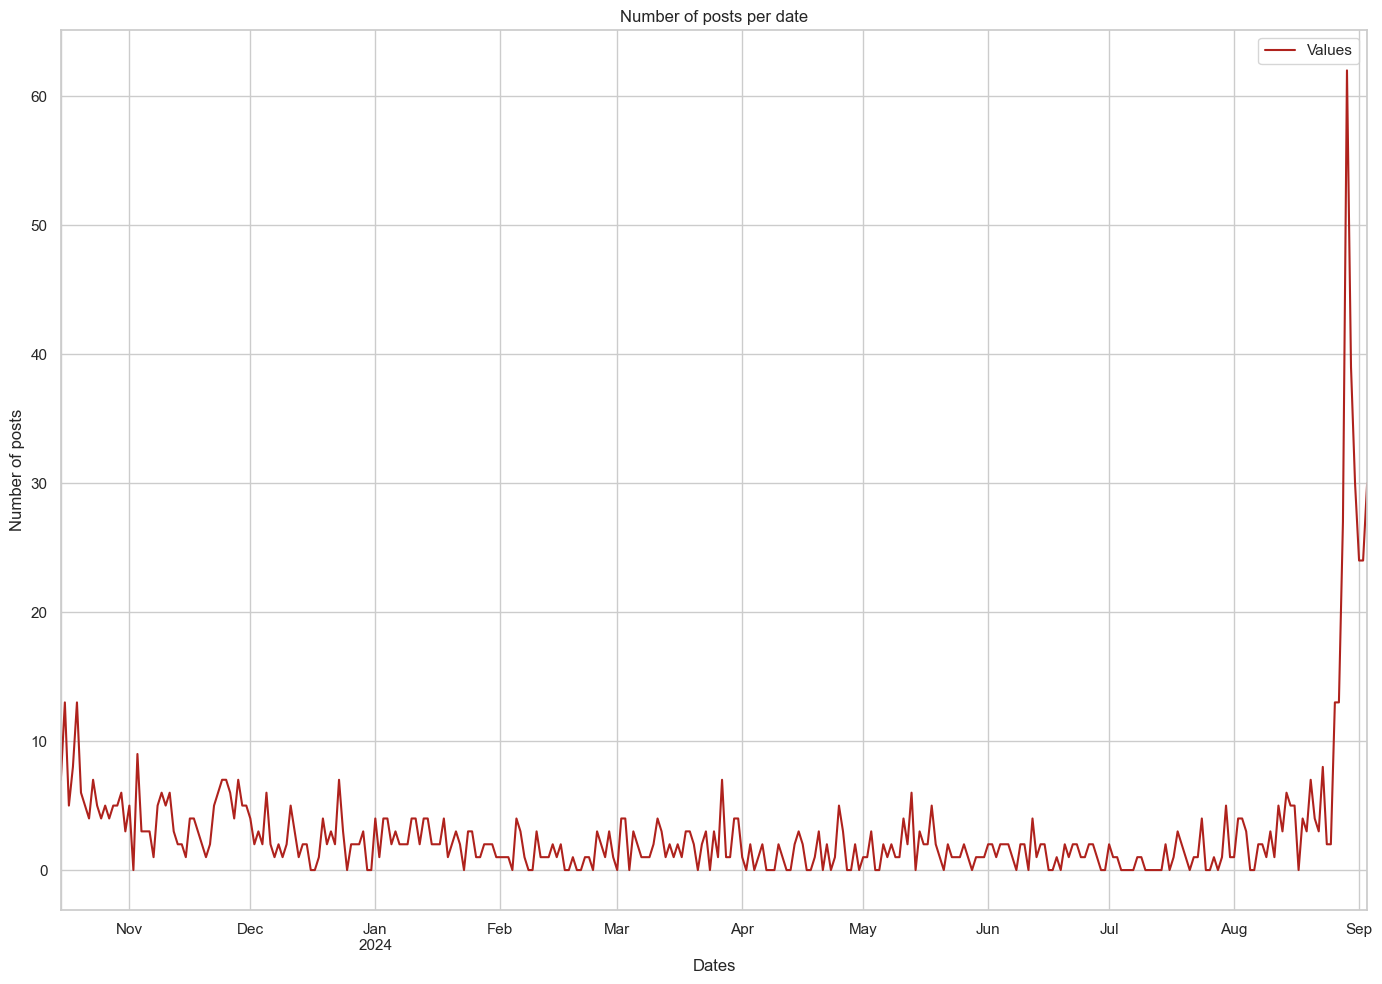

In [22]:
# Posts per date
num_posts_per_date = omitb_df.groupby('Date')['Post'].count()
visualiser.display_time_series_stats(num_posts_per_date, 'count', 'Number of posts per date', 'Dates', 'Number of posts', mabel)

Posts per author:
           Author  count
437   kaitlinsmom     38
406   goawayjules     35
213          None     22
514  taydraisabot     20
411    hannahlemp     18


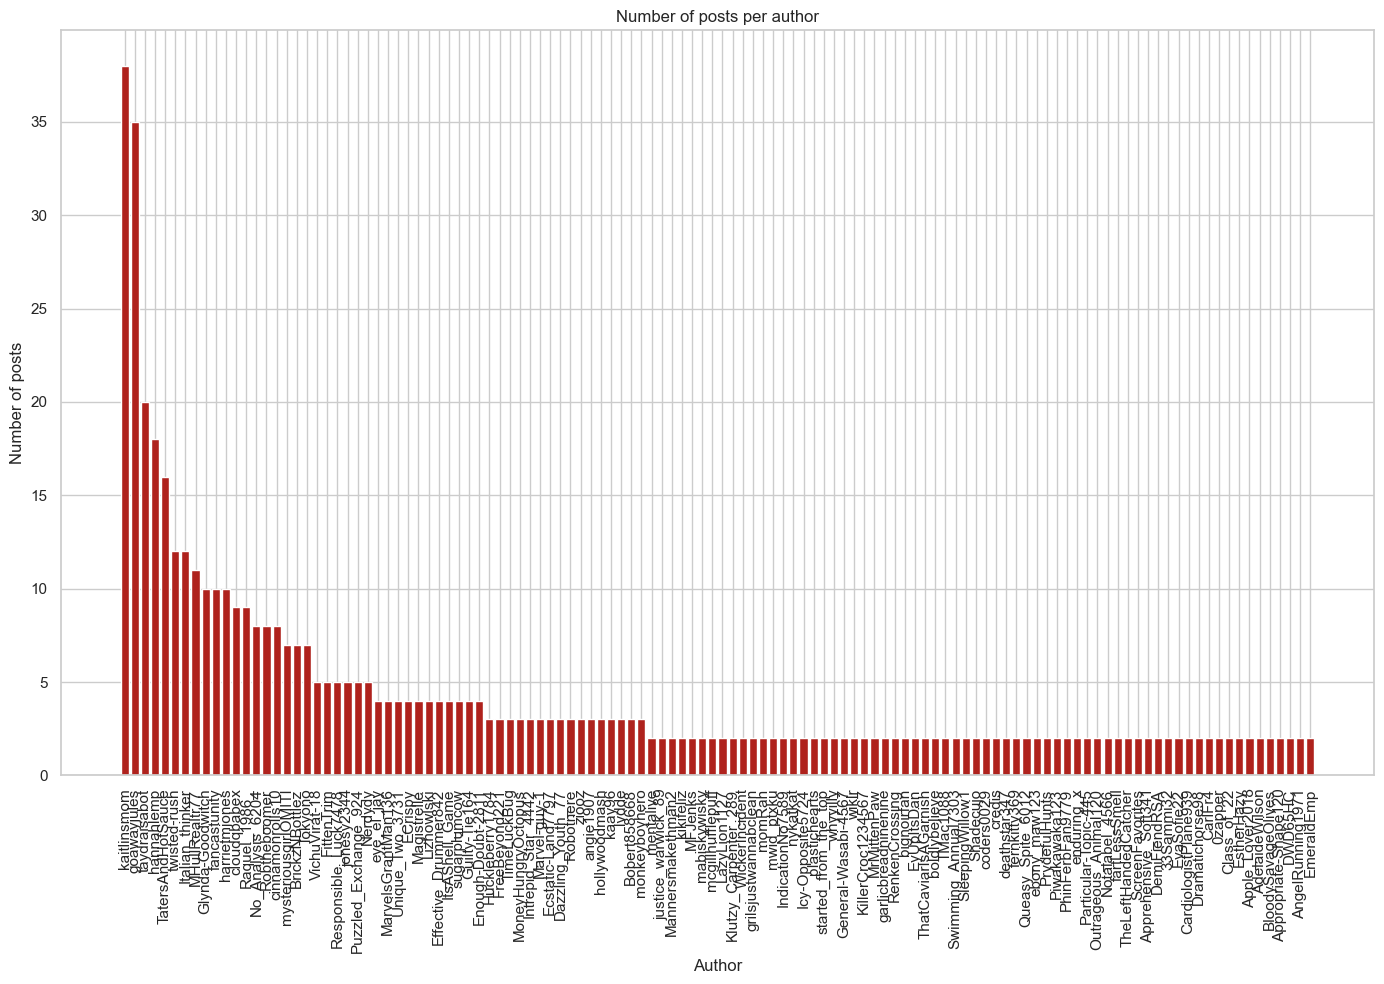

In [23]:
# Posts per author
num_posts_per_author = omitb_df.groupby('Author')['Post'].count()

num_posts_per_author_ordered = num_posts_per_author.reset_index(name='count').sort_values(['count'], ascending=False)
print(f'Posts per author:\n{num_posts_per_author_ordered.head()}')

filtered_df = num_posts_per_author_ordered[num_posts_per_author_ordered['count'] > 1 ]
filtered_df = filtered_df[filtered_df['Author'] != 'None']

num_posts_per_author_y = filtered_df['count']
author_x = filtered_df['Author']

visualiser.generate_bar_chart(author_x, num_posts_per_author_y, mabel, 'Number of posts per author', 'Author', 'Number of posts')

Number of comments per date ordered:
          Date   sum
255 2024-08-27  1853
262 2024-09-03  1556
257 2024-08-29   859
256 2024-08-28   639
258 2024-08-30   581


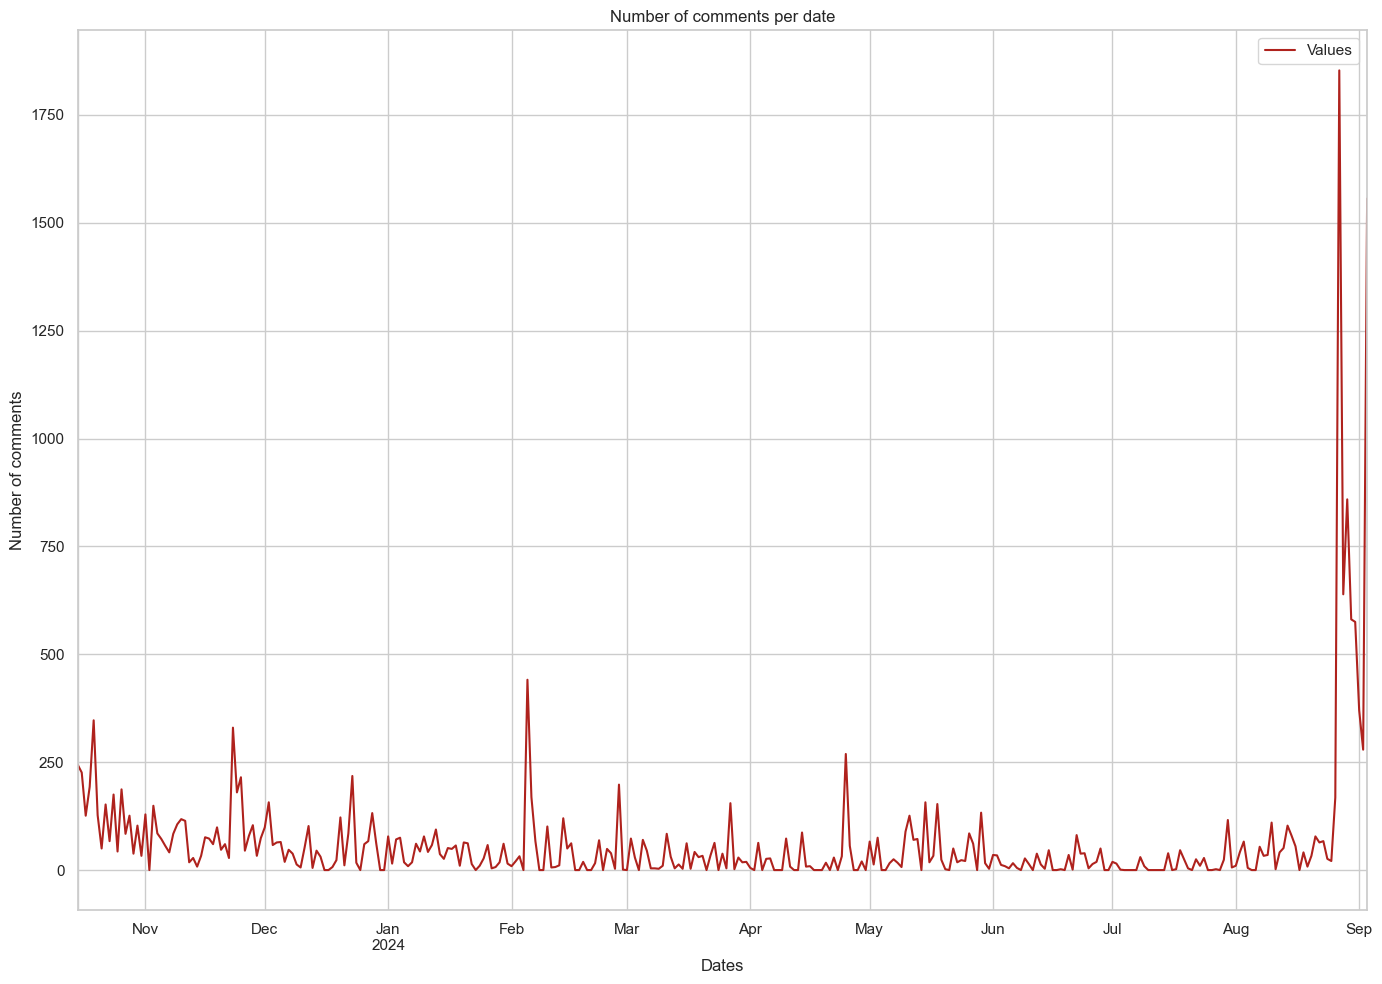

In [24]:
# Comments per date
num_comments_per_date = omitb_df.groupby('Date')['Num_comments'].sum()
visualiser.display_time_series_stats(num_comments_per_date, 'sum', 'Number of comments per date', 'Dates', 'Number of comments', mabel)

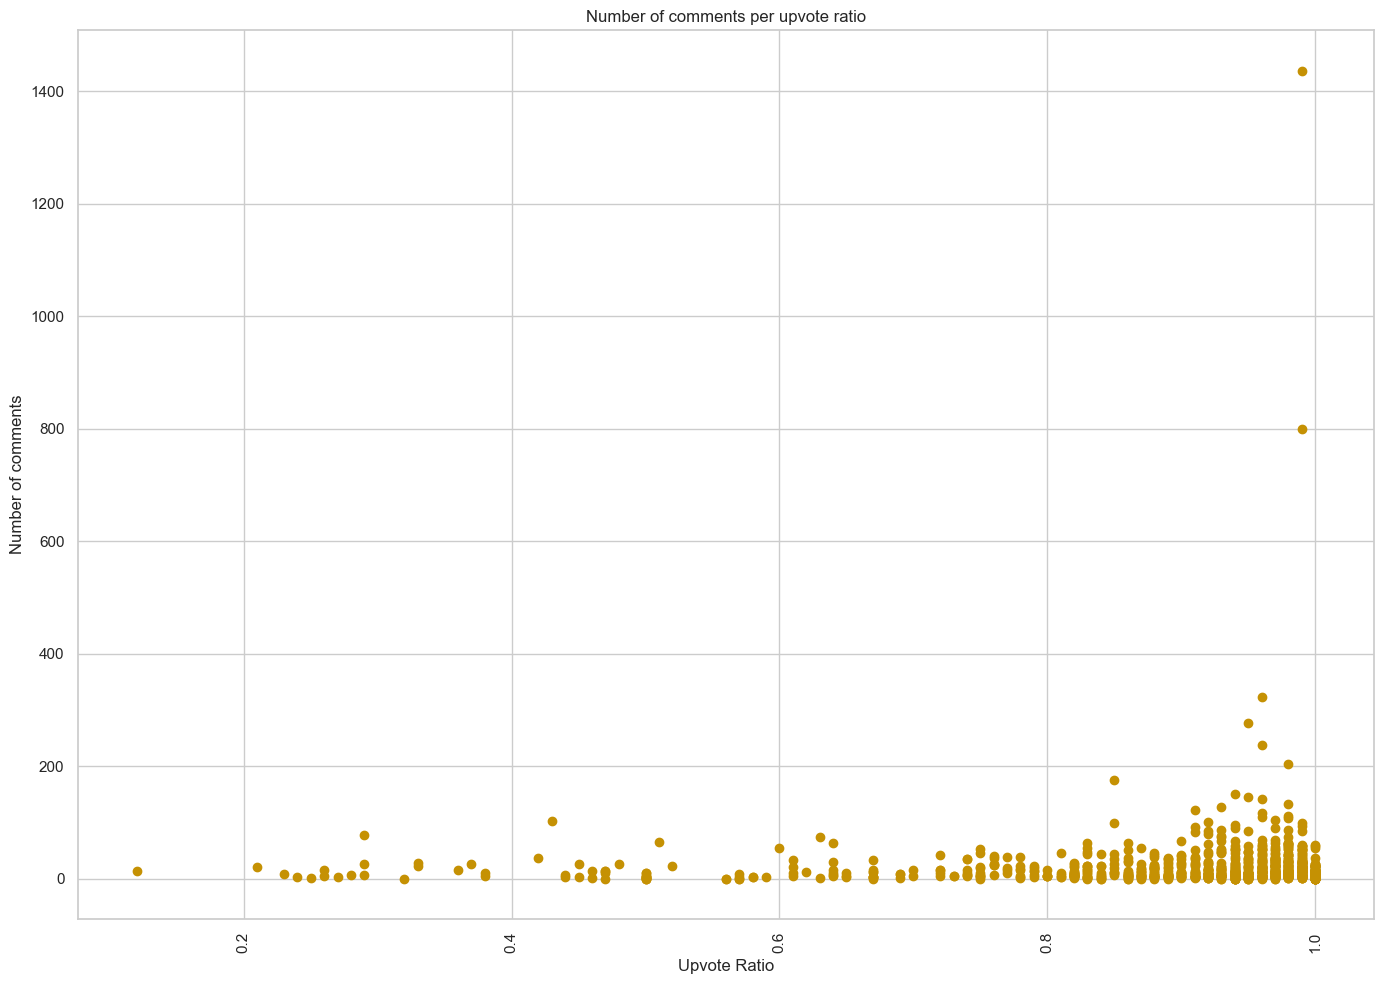

In [25]:
# Comments vs upvote_ratio 
num_comments_y = omitb_df['Num_comments'].tolist()
upvote_ratio_x = omitb_df['Upvote_ratio'].tolist()

visualiser.generate_scatter_plot(upvote_ratio_x, num_comments_y, charles, 'Number of comments per upvote ratio', 'Upvote Ratio', 'Number of comments')


#### Step 2 : : Pre-processing

-----------------
Term frequency
-----------------

.: 14917
the: 14492
,: 9635
I: 8300
to: 7722
a: 6952
and: 6816
’: 5602
of: 5139
in: 4877
!: 4542
it: 4497
is: 4296
that: 3982
?: 3763
was: 3535
for: 2987
s: 2552
be: 2462
this: 2260
but: 2260
on: 2203
with: 2141
her: 1924
she: 1905
season: 1868
they: 1865
): 1837
Charles: 1810
so: 1805
(: 1803
*: 1690
like: 1676
have: 1670
think: 1512
": 1501
he: 1466
t: 1395
just: 1382
The: 1371
not: 1354
as: 1341
you: 1300
show: 1278
would: 1233
about: 1170
or: 1148
if: 1115
are: 1105
from: 1105
----------------------------------


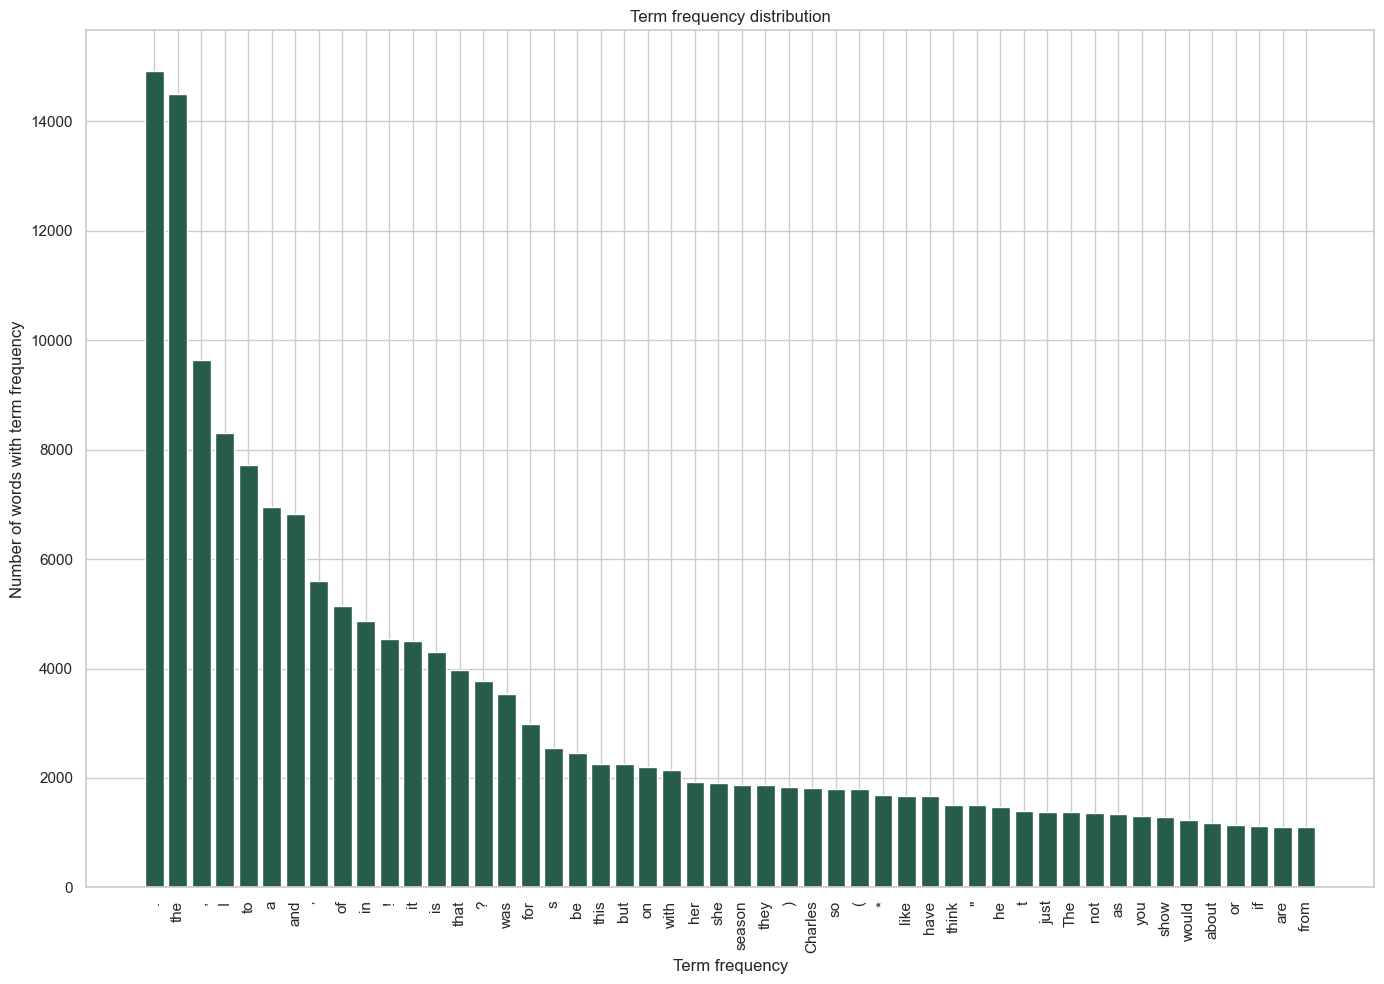

In [26]:
flatted_unprocessed_token_list = [element for innerList in unprocessed_token_lists for element in innerList]   

helper.compute_term_freq(flatted_unprocessed_token_list, True)

-----------------
Term frequency
-----------------

season: 2297
charles: 1830
like: 1772
think: 1523
show: 1287
would: 1259
one: 1089
sazz: 1004
love: 955
episode: 900
also: 896
mabel: 855
know: 806
could: 765
see: 744
get: 708
really: 697
time: 675
oliver: 651
im: 638
maybe: 622
someone: 565
i'm: 536
something: 528
character: 525
good: 512
much: 501
apartment: 495
people: 490
going: 484
murder: 479
killer: 468
building: 457
martin: 455
first: 454
back: 440
even: 438
new: 437
way: 437
dont: 414
make: 413
want: 402
still: 391
thought: 391
got: 382
great: 378
well: 372
howard: 366
last: 355
jan: 352
----------------------------------


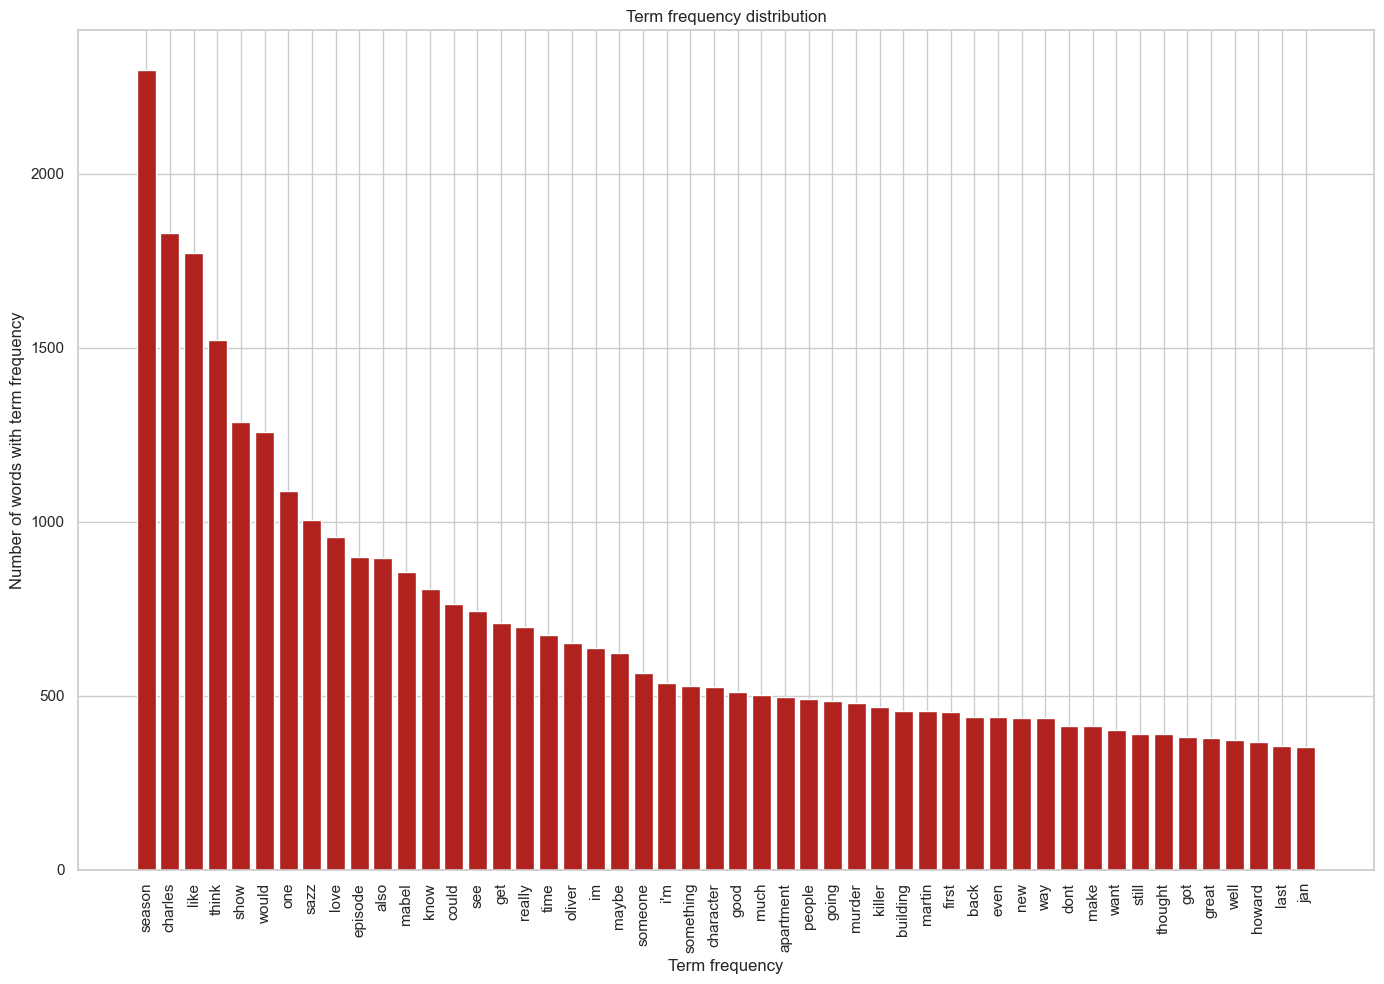

In [27]:
processed_token_lists = [element for innerList in processed_token_lists for element in innerList]   

helper.compute_term_freq(processed_token_lists, True, mabel)

In [28]:
print(f'Number of unprocessed tokens: {len(flatted_unprocessed_token_list)}\nNumber of processed tokens: {len(processed_token_lists)}')

Number of unprocessed tokens: 385475
Number of processed tokens: 168350


#### Step 3 : : Models

1. n-grams
2. upvotes
3. sentiment analysis 
    - count method
        <sentiment / dates>
    - vader
        <sentiment / dates>
4. topic modelling
    - term doc freq
    - TDA
    - params


In [29]:
top_50_bi_grams =  nltk.collocations.BigramCollocationFinder.from_words(processed_token_lists).ngram_fd.most_common(50)
top_50_tri_grams = nltk.collocations.TrigramCollocationFinder.from_words(processed_token_lists).ngram_fd.most_common(50)

In [30]:
# Sentiment analysis
count_sentiment_list = helper.sentiment_analysis('Count', omitb_df)



------------Analysing sentiment------------
Date: 2024-09-03 00:00:00

Post:
Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu's official Only Murders in the Building Season 4 post episode discussion thread. 

Use this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\*

If you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don't get spoiled.

A reminder that the sub will be locked for new posts for 24 hours following the episode's release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).

A reminder on spoilers:

* Keep spoilers out of any post titles
* Do not share spoilers f

In [31]:
for row in omitb_df.itertuples(index=True):
    print(f'\n------------\nIndex: {row[0]}\n------------\n{row.Post}\n------------\n\n')


------------
Index: 0
------------
Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu's official Only Murders in the Building Season 4 post episode discussion thread. 

Use this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\*

If you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don't get spoiled.

A reminder that the sub will be locked for new posts for 24 hours following the episode's release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).

A reminder on spoilers:

* Keep spoilers out of any post titles
* Do not share spoilers from future episodes under this post
* Spoil

In [32]:
vader_sentiment_list = helper.sentiment_analysis('Vader', omitb_df)



------------Analysing sentiment------------
Date: 2024-09-03 00:00:00

Post:
Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu's official Only Murders in the Building Season 4 post episode discussion thread. 

Use this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\*

If you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don't get spoiled.

A reminder that the sub will be locked for new posts for 24 hours following the episode's release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).

A reminder on spoilers:

* Keep spoilers out of any post titles
* Do not share spoilers f

In [33]:
# https://medium.com/bitgrit-data-science-publication/sentiment-analysis-on-reddit-tech-news-with-python-cbaddb8e9bb6

In [34]:
# Topic modelling
num_topic = 10
max_word_count_to_display = 15
num_features = 1500

In [35]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
tf = tf_vectorizer.fit_transform(processed_token_lists)

tf_feature_names = tf_vectorizer.get_feature_names_out()

In [36]:
lda_model = LatentDirichletAllocation(n_components =num_topic, max_iter=10, learning_method='online').fit(tf)

#### Step 4 : : Analysis

1. Present what topics are being discussed eg: top-K terms, word-cloud etc. by **topic modelling** 
2. What are the topics, does it correspond to recent news etc

In [37]:
# n-grams
top_50_bi_grams

[(('steve', 'martin'), 226),
 (('feel', 'like'), 163),
 (('martin', 'short'), 161),
 (('murders', 'building'), 152),
 (('gif', 'giphy'), 143),
 (('meryl', 'streep'), 109),
 (('dont', 'think'), 100),
 (('pickwick', 'triplets'), 100),
 (('last', 'season'), 99),
 (('looks', 'like'), 93),
 (('anyone', 'else'), 90),
 (('selena', 'gomez'), 90),
 (('eugene', 'levy'), 87),
 (('scott', 'bakula'), 85),
 (('charles', 'oliver'), 81),
 (('love', 'interest'), 80),
 (('paul', 'rudd'), 74),
 (('murder', 'mystery'), 74),
 (('red', 'herring'), 73),
 (('next', 'season'), 72),
 (('seems', 'like'), 69),
 (('upon', 'time'), 68),
 (('time', 'west'), 68),
 (('season', 'one'), 67),
 (('charles', 'apartment'), 66),
 (('first', 'episode'), 64),
 (('love', 'show'), 64),
 (('dont', 'know'), 63),
 (('someone', 'else'), 62),
 (('season', 'episode'), 61),
 (('west', 'tower'), 57),
 (('makes', 'sense'), 56),
 (('oliver', 'putnam'), 56),
 (('think', 'would'), 55),
 (('fly', 'wall'), 55),
 (('felt', 'like'), 54),
 (('ma

In [38]:
top_50_tri_grams

[(('upon', 'time', 'west'), 68),
 (('steve', 'martin', 'martin'), 46),
 (('martin', 'martin', 'short'), 46),
 (('murders', 'building', 'season'), 36),
 (('death', 'rattle', 'dazzle'), 25),
 (('whole', 'new', 'direction'), 19),
 (('new', 'love', 'interest'), 18),
 (('episodes', 'episode', '4.10'), 18),
 (('true', 'crime', 'podcast'), 15),
 (('would', 'make', 'sense'), 15),
 (('charles', 'oliver', 'mabel'), 15),
 (('first', 'two', 'seasons'), 15),
 (('bakula', 'says', 'hi'), 14),
 (('investigation', 'whole', 'new'), 14),
 (('would', 'love', 'see'), 14),
 (('love', 'interest', 'every'), 14),
 (('interest', 'every', 'season'), 14),
 (('love', 'interest', 'season'), 13),
 (('id', 'love', 'see'), 13),
 (('charles', 'haden', 'savage'), 11),
 (('sends', 'investigation', 'whole'), 10),
 (('bullet', 'hole', 'window'), 10),
 (('stand', 'close', 'sting'), 10),
 (('one', 'ben', 'glenroy'), 10),
 (('note', 'jans', 'door'), 9),
 (('anyone', 'else', 'think'), 9),
 (('anyone', 'else', 'notice'), 9),
 (

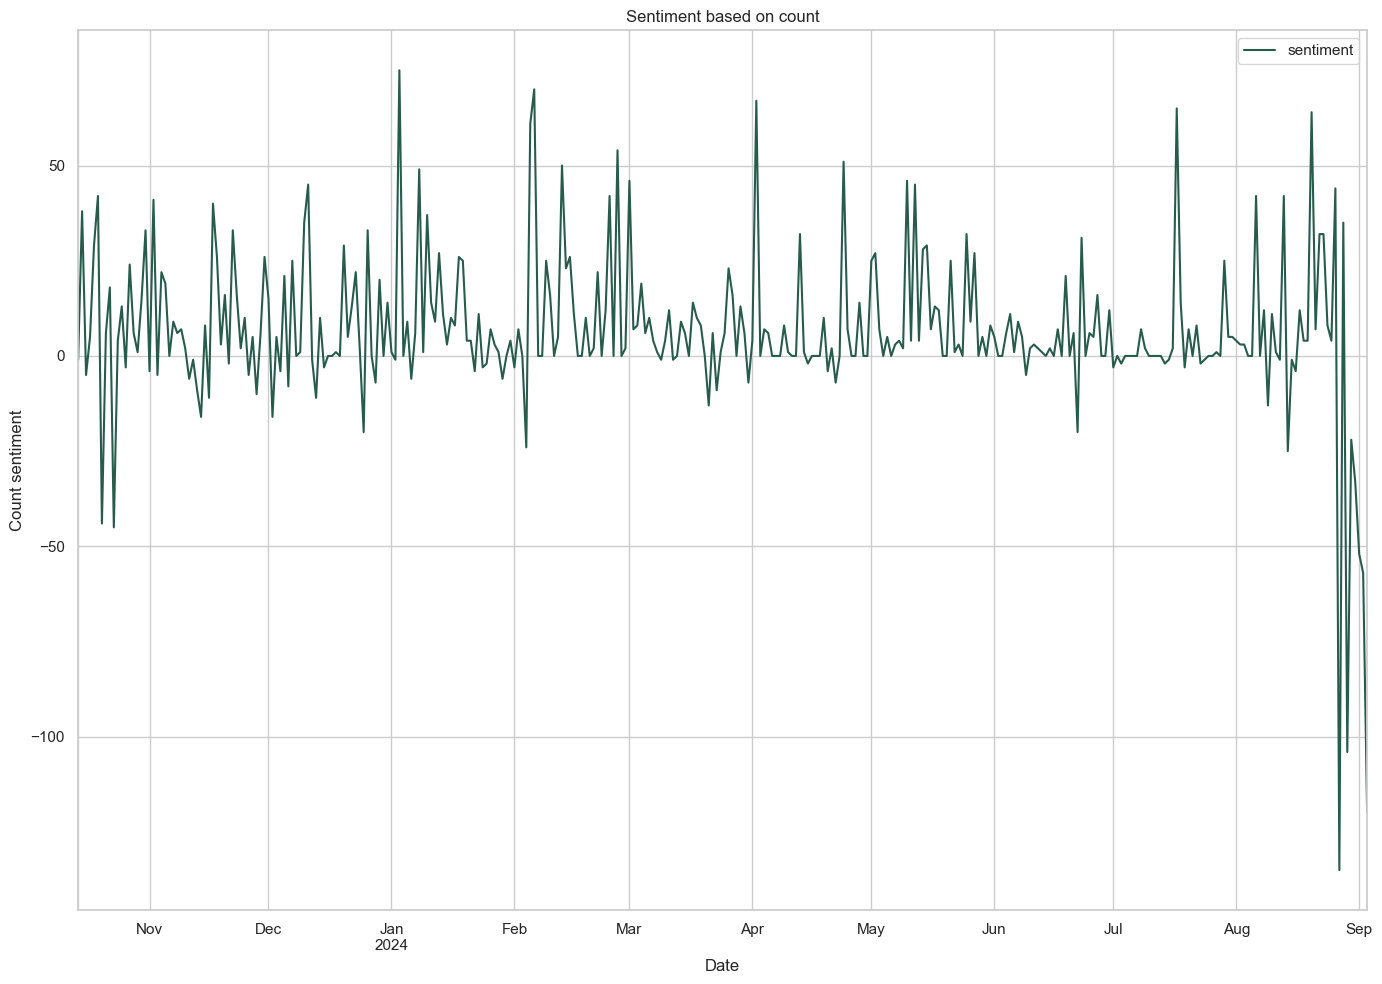

In [39]:
# Sentiment analysis
visualiser.generate_time_series(count_sentiment_list, 'Sentiment based on count', 'date', 'sentiment', 'Date', 'Count sentiment', oliver)

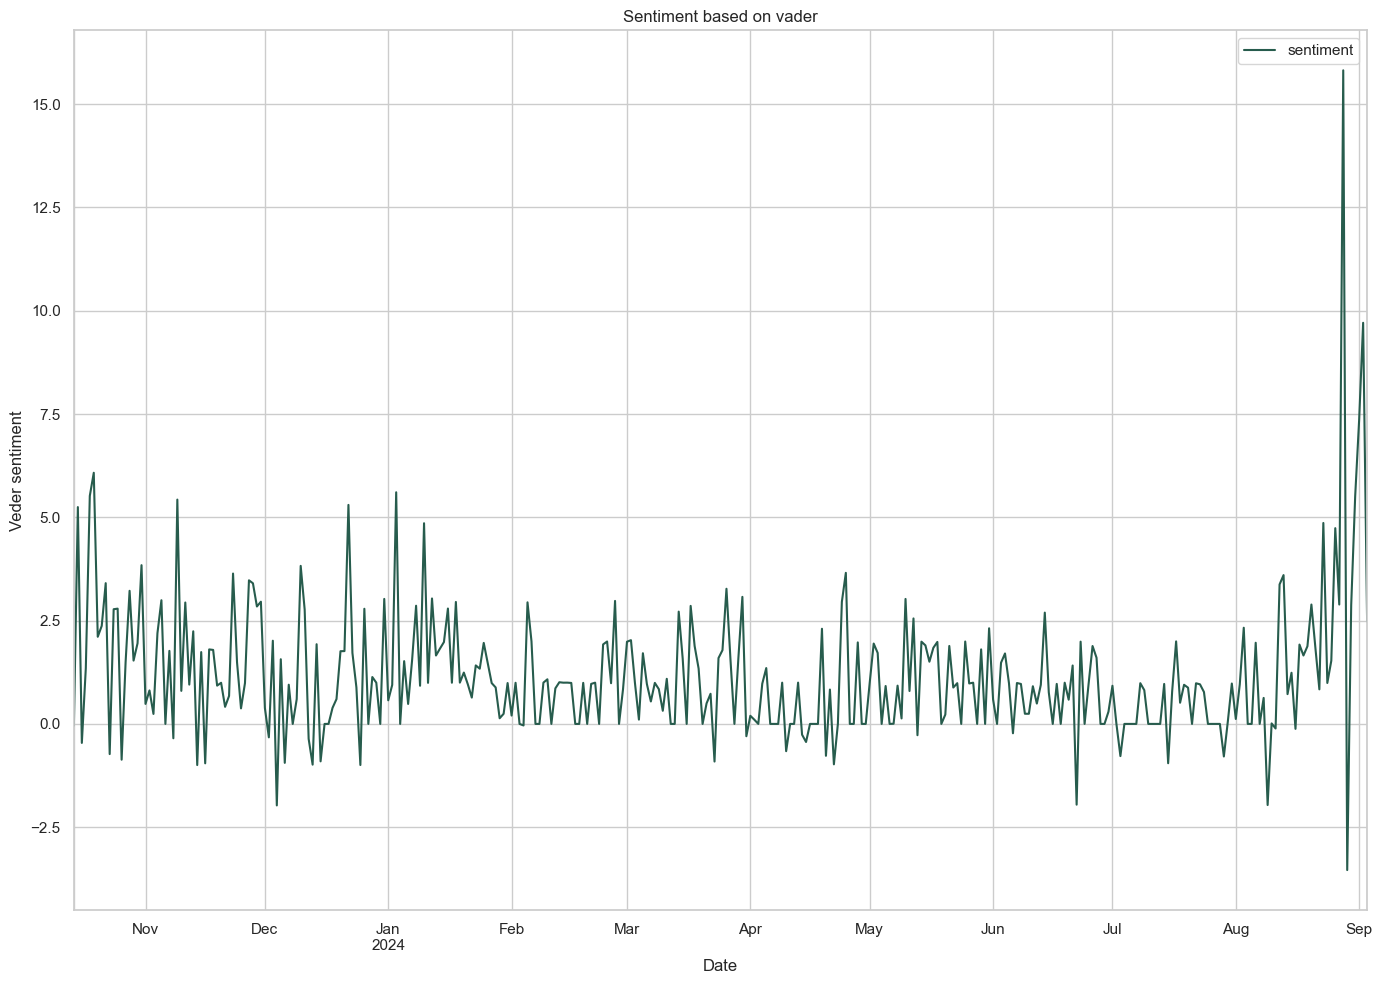

In [40]:
visualiser.generate_time_series(vader_sentiment_list, 'Sentiment based on vader', 'date', 'sentiment', 'Date', 'Veder sentiment', oliver)

In [41]:
visualiser.display_topics(lda_model, tf_feature_names, max_word_count_to_display)

Topic 0:
charles selena hope life better s3 funny set bakula wait id musical tim theyre seeing
Topic 1:
maybe way murders podcast best lol trio ben seasons didnt things death la moriarty mean
Topic 2:
like character lot actually howard old work different idea theres main place guy friend absolutely
Topic 3:
episode good going thought movie watching yes bad actor point kill looking believe streep used
Topic 4:
im murder watch scene right look bunny person ve real oh wanted watched pickwick dead
Topic 5:
know theo dont great feel omitb sure little episodes cast theory hes shows loved joy
Topic 6:
season mabel oliver really want thing probably say kind short definitely loretta come looks saw
Topic 7:
love new building make got apartment fun story meryl comedy dips trying triplets song says
Topic 8:
sazz time people martin jan steve said mystery makes bit felt day years saying times
Topic 9:
think killer characters end shes arconia series favorite thats need seen big sense case tobert


In [42]:
# pyLDAvis
panel = pyLDAvis.lda_model.prepare(lda_model, tf, tf_vectorizer, mds='tsne')

pyLDAvis.display(panel)

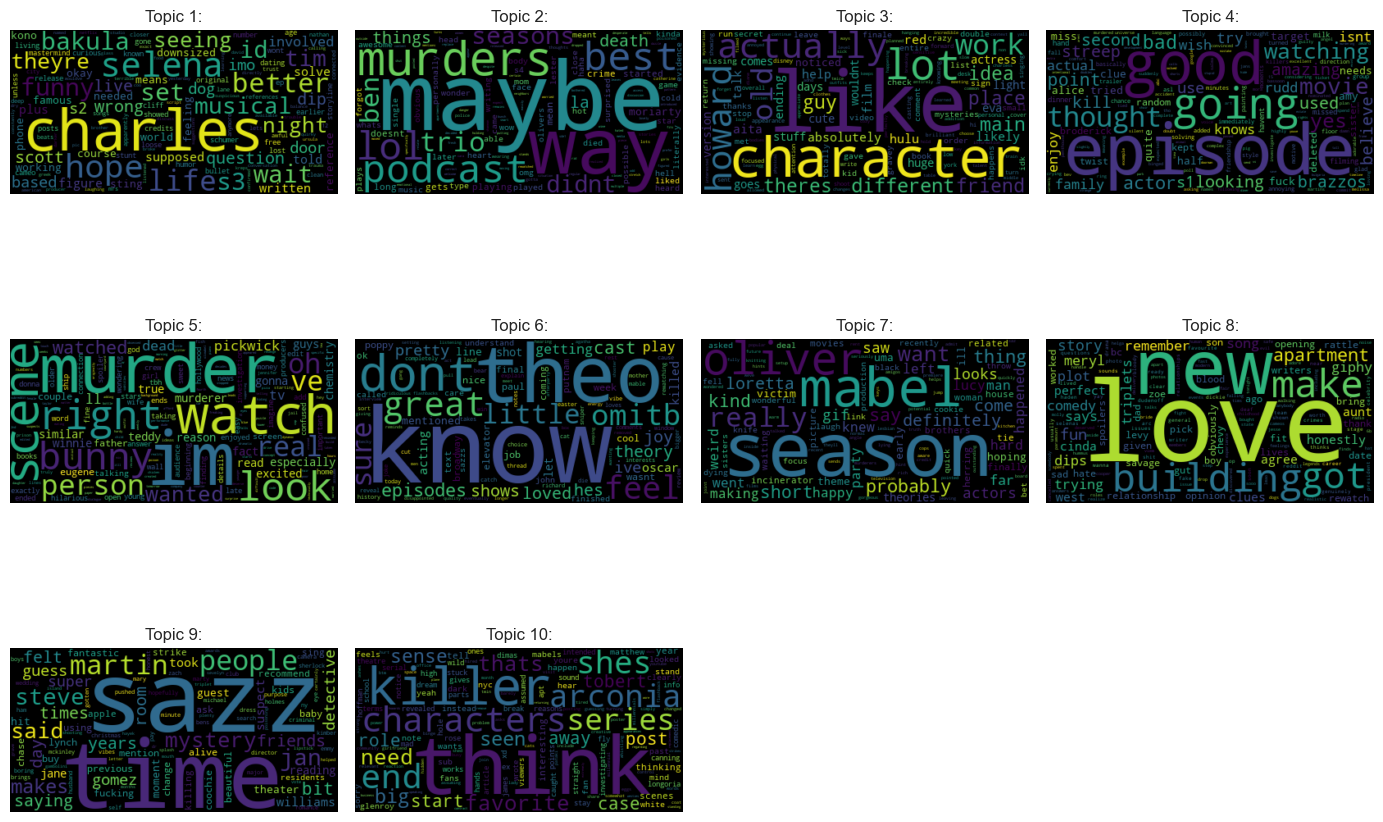

In [43]:
# wordcloud
visualiser.display_word_cloud(lda_model, tf_feature_names)